## Bonus Assignment 

(if dataset has time-series like features) 3-layer Recurrent Neural Network with Keras

<hr>

## **Linear Regression (With Time Series Data)**

### About The Dataset 

**Context**

I get this dataset from UCI Machine Learning. I very interested with this dataset because one of our global warming problem is about air quality in some big city very serious. In UCI ML get this data from sensor device that located in Italy. Also you can read about the dataset in the description.

**Content**

I get this data from UCI Machine Learning. Here is about descripstion rows and column also another description.
"The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. "

**Import Libraries**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('./daily-website-visitors.csv')
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [37]:
df.isnull().sum()

Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

In [39]:
df.describe()

,Row,Day.Of.Week
count,2167.000000,2167.000000
mean,1084.000000,3.997231
std,625.703338,2.000229
min,1.000000,1.000000
25%,542.500000,2.000000
50%,1084.000000,4.000000
75%,1625.500000,6.000000
max,2167.000000,7.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sort the dataframe by date
df.sort_values('Date', inplace=True)

# Convert 'Page.Loads' to numeric after removing commas
df['Page.Loads'] = df['Page.Loads'].replace(',', '', regex=True).astype(float)
df['Unique.Visits'] = df['Unique.Visits'].replace(',', '', regex=True).astype(float)
df['First.Time.Visits'] = df['First.Time.Visits'].replace(',', '', regex=True).astype(float)

# Convert target variable to numeric
df['Returning.Visits'] = pd.to_numeric(df['Returning.Visits'], errors='coerce')

# Drop rows with missing values in the target variable
df = df.dropna(subset=['Returning.Visits'])

# Extract features and target variable
features = df[['Day.Of.Week', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits']]
target = df['Returning.Visits']

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Reshape data for RNN input (samples, time steps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1]), return_sequences=True))
model.add(SimpleRNN(50, activation='relu', return_sequences=True))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(1))  # Adjust activation based on your task

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=8, validation_data=(X_test_reshaped, y_test), verbose=2)

# Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Mean Squared Error on Test Set: {loss}')

# Predict the target variable on the test set
y_pred = model.predict(X_test_reshaped)

# Flatten the predictions and true values
y_pred = y_pred.flatten()
y_test = np.array(y_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score on Test Set: {r2}')


Epoch 1/50
217/217 - 3s - loss: 175476.7188 - val_loss: 10984.9082 - 3s/epoch - 14ms/step
Epoch 2/50
217/217 - 1s - loss: 9591.0039 - val_loss: 6639.0386 - 521ms/epoch - 2ms/step
Epoch 3/50
217/217 - 1s - loss: 6651.1348 - val_loss: 5421.9751 - 529ms/epoch - 2ms/step
Epoch 4/50
217/217 - 1s - loss: 5867.5435 - val_loss: 5198.2524 - 519ms/epoch - 2ms/step
Epoch 5/50
217/217 - 1s - loss: 5706.0986 - val_loss: 5263.5601 - 524ms/epoch - 2ms/step
Epoch 6/50
217/217 - 1s - loss: 5668.6133 - val_loss: 5148.4609 - 551ms/epoch - 3ms/step
Epoch 7/50
217/217 - 1s - loss: 5656.9629 - val_loss: 5166.9453 - 546ms/epoch - 3ms/step
Epoch 8/50
217/217 - 1s - loss: 5634.5386 - val_loss: 5091.6470 - 541ms/epoch - 2ms/step
Epoch 9/50
217/217 - 1s - loss: 5558.9683 - val_loss: 5096.8359 - 528ms/epoch - 2ms/step
Epoch 10/50
217/217 - 1s - loss: 5541.9468 - val_loss: 5065.5215 - 522ms/epoch - 2ms/step
Epoch 11/50
217/217 - 1s - loss: 5517.0508 - val_loss: 5168.0439 - 514ms/epoch - 2ms/step
Epoch 12/50
217/21

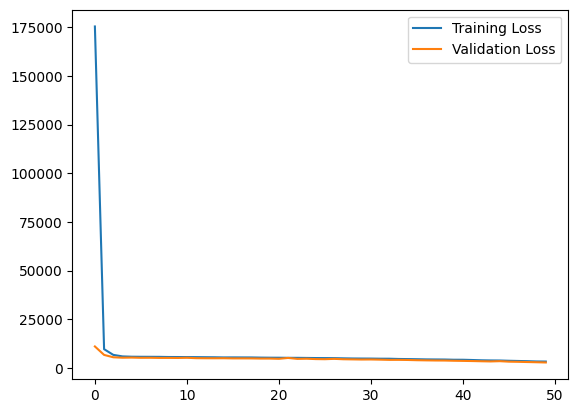

In [62]:
# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()